In [21]:
# Load training output csv file and convert to columnar/numeric format
import pandas as pd
import numpy as np


training_data = pd.read_csv('nn_training_output.csv')
training_data_cpu = pd.read_csv('nn_training_output_cpu.csv')

data_prefix = ['epoch: ', ' unfiltered:  ', ' train loss:  ', ' consistency:  ', ' epoch_time =  ', ' test loss:  ', ' validation loss:  ']

for i in range(training_data.shape[1]):
    # Convert each column to a string and format it
    if i == 0: 
        # Epoch number saved as an integer
        training_data.iloc[:, i] = training_data.iloc[:, i].astype(str).apply(lambda x: int(x[len(data_prefix[i]):]) if x.startswith(data_prefix[i]) else x)
        training_data_cpu.iloc[:, i] = training_data_cpu.iloc[:, i].astype(str).apply(lambda x: int(x[len(data_prefix[i]):]) if x.startswith(data_prefix[i]) else x)


    elif i < training_data.shape[1] - 1:
        # Other columns are saved as floats
        training_data.iloc[:, i] = training_data.iloc[:, i].astype(str).apply(lambda x: float(x[len(data_prefix[i]):]) if x.startswith(data_prefix[i]) else x)
        training_data_cpu.iloc[:, i] = training_data_cpu.iloc[:, i].astype(str).apply(lambda x: float(x[len(data_prefix[i]):]) if x.startswith(data_prefix[i]) else x)
    
    else: 
        # Last column is saved as a float with removal of the suffix "  ***\" if exists
        training_data.iloc[:, i] = training_data.iloc[:, i].astype(str).apply(lambda x: x[len(data_prefix[i]):-1] if x.startswith(data_prefix[i]) else x)
        training_data.iloc[:, i] = training_data.iloc[:, i].astype(str).apply(lambda x: float(x[:-6]) if x.endswith(' ***') else float(x))

        training_data_cpu.iloc[:, i] = training_data_cpu.iloc[:, i].astype(str).apply(lambda x: x[len(data_prefix[i]):-1] if x.startswith(data_prefix[i]) else x)
        training_data_cpu.iloc[:, i] = training_data_cpu.iloc[:, i].astype(str).apply(lambda x: float(x[:-6]) if x.endswith(' ***') else float(x))
    
    

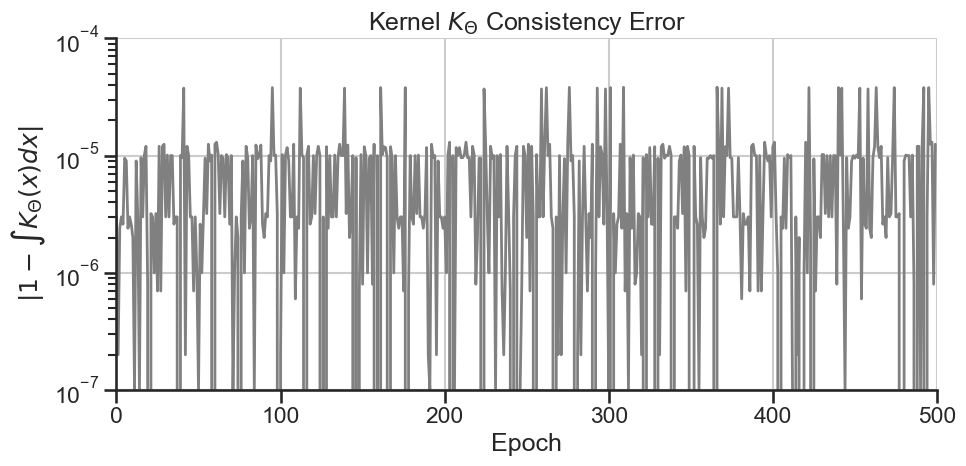

In [26]:
# Plot consistency and epoch times
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set(rc={'figure.figsize':(6,4)})
sns.color_palette('bright')
sns.set_style("white")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_style("ticks", rc=custom_params)
sns.set_context("talk")

# Plot consistency
plt.figure(figsize=(10, 5))
plt.semilogy(training_data['Epoch'], abs(1-training_data['Consistency']), color='gray', linewidth=2)
# plt.semilogy(training_data_cpu['Epoch'], abs(1-training_data_cpu['Consistency']), color='blue', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel(r'$|1-\int K_\Theta(x) dx|$')
plt.title(r'Kernel $K_\Theta$ Consistency Error')
plt.xlim(0, 500)
plt.ylim(1e-7, 1e-4)
plt.grid()
plt.tight_layout()
plt.savefig('kernel_training_consistency_error.pdf')
plt.show()


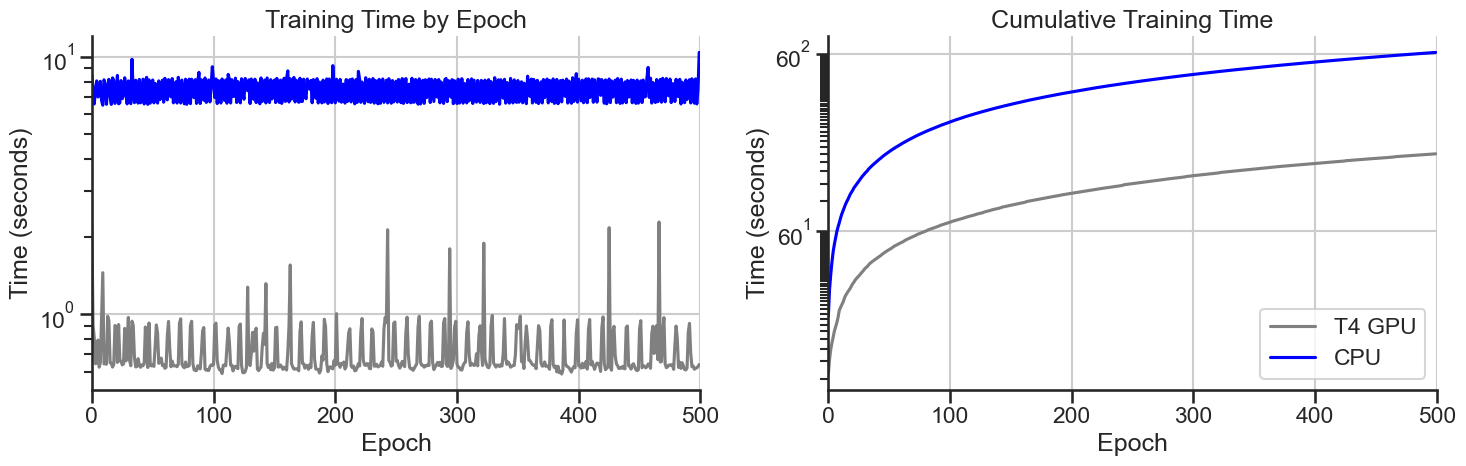

Final Training time, GPU: 358.7516419887543 seconds
Final Training time, CPU: 3717.154768228531 seconds
Mean, GPU: 0.7175032839775085 seconds
Mean, CPU: 7.434309536457062 seconds


In [25]:
# Plot Training time 
sns.set()
sns.set(rc={'figure.figsize':(6,4)})
sns.color_palette('bright')
sns.set_style("white")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_style("ticks", rc=custom_params)
sns.set_context("talk")

# Calculate cumulative epoch time
cumulative_time = training_data['Epoch Time'].cumsum()
cumulative_time_cpu = training_data_cpu['Epoch Time'].cumsum()

# Plot epoch times
plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1,2, 1)
plt.semilogy(training_data['Epoch'], training_data['Epoch Time'], label='T4 GPU', color='gray')
plt.semilogy(training_data_cpu['Epoch'], training_data_cpu['Epoch Time'], label='CPU', color='blue')
# plt.plot(training_data['epoch'], cumulative_time, label='Cumulative', color='green')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Training Time by Epoch')
plt.xlim(0, 500)
plt.grid()
# plt.legend()
plt.tight_layout()

# Plot epoch times
plt.subplot(1, 2, 2)
plt.semilogy(training_data['Epoch'], cumulative_time, label='T4 GPU', color='gray')
plt.semilogy(training_data['Epoch'], cumulative_time_cpu, label='CPU', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Cumulative Training Time')
plt.xlim(0, 500)
ax = plt.gca()
ax.set_yscale('log', base=60)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('training_times.pdf')
plt.show()

print('Final Training time, GPU:', cumulative_time.iloc[-1], 'seconds')
print('Final Training time, CPU:', cumulative_time_cpu.iloc[-1], 'seconds')

print('Mean, GPU:', training_data['Epoch Time'].mean(), 'seconds')
print('Mean, CPU:', training_data_cpu['Epoch Time'].mean(), 'seconds')

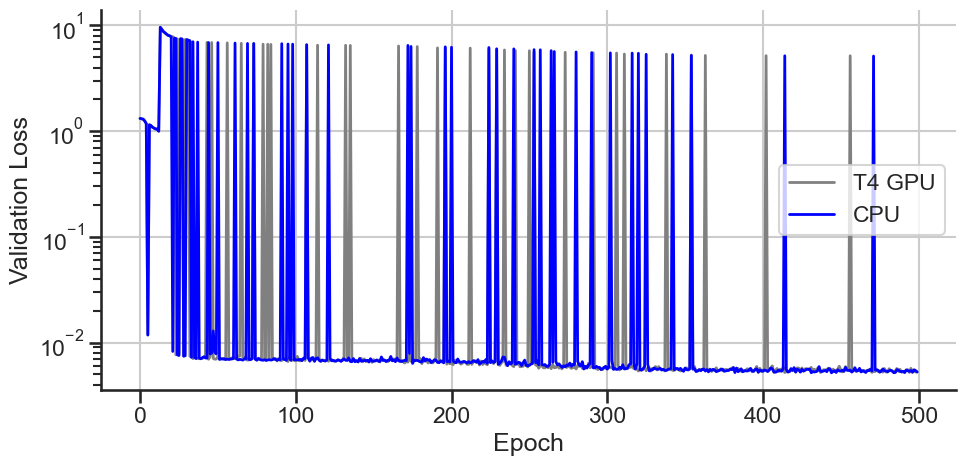

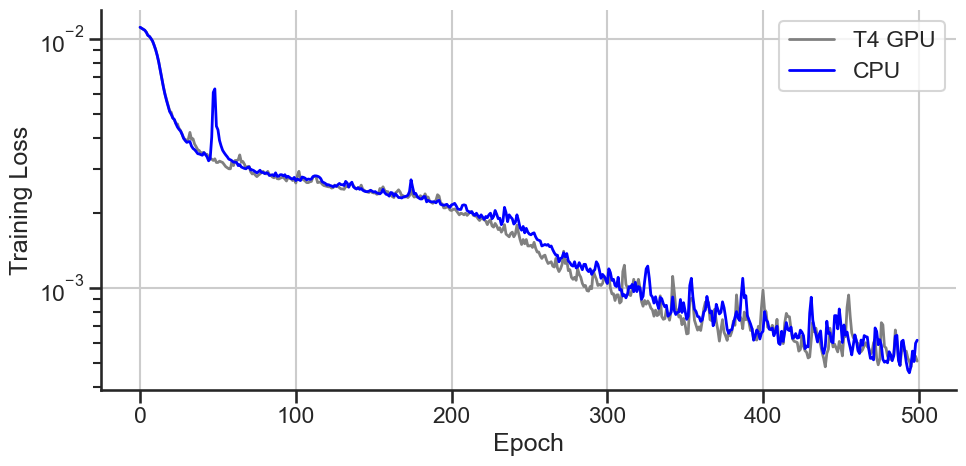

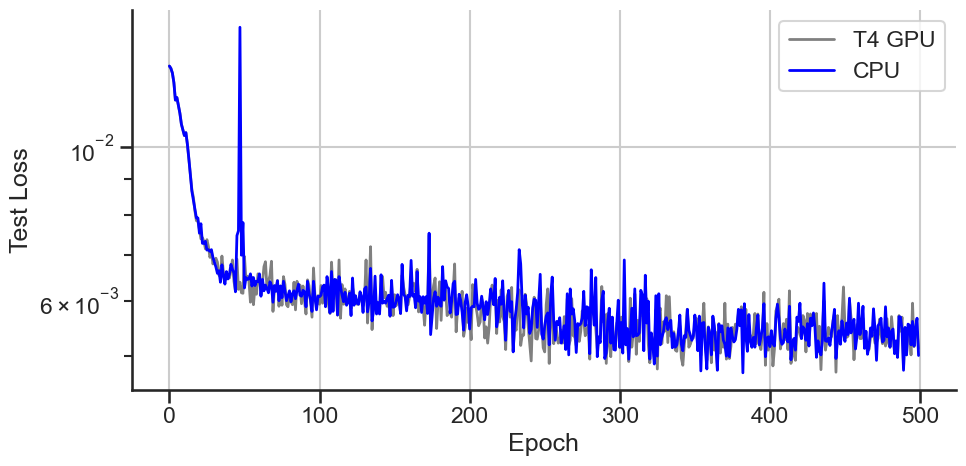

In [24]:
sns.set()
sns.set(rc={'figure.figsize':(6,4)})
sns.color_palette('bright')
sns.set_style("white")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_style("ticks", rc=custom_params)
sns.set_context("talk")

# Plot validation loss
plt.figure(figsize=(10, 5))
plt.semilogy(training_data['Epoch'], training_data['Validation Loss'], color='gray', label='T4 GPU', linewidth=2)
plt.semilogy(training_data_cpu['Epoch'], training_data_cpu['Validation Loss'], color='blue', label='CPU', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.semilogy(training_data['Epoch'], training_data['Training Loss'], color='gray', label='T4 GPU', linewidth=2)
plt.semilogy(training_data_cpu['Epoch'], training_data_cpu['Training Loss'], color='blue', label='CPU', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plot test loss
plt.figure(figsize=(10, 5))
plt.semilogy(training_data['Epoch'], training_data['Test Loss'], color='gray', label='T4 GPU', linewidth=2)
plt.semilogy(training_data_cpu['Epoch'], training_data_cpu['Test Loss'], color='blue', label='CPU', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()